In [3]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
import re
import scienceplots
import glob
import os
plt.style.use(['science','grid','notebook'])
from scipy.interpolate import UnivariateSpline


In [11]:
from scipy.interpolate import CubicSpline as cs

def one_sigma(x,y,x_true,y_true,plot=False):
    
    spline = cs(x, y-y_true, bc_type='natural')
    ix=[1,2]
    root= cs(x, y-y_true-1, bc_type='natural').roots()
    root=np.array(root)

    left_root = root[root < x_true].max()
    right_root = root[root > x_true].min()
    if len(root)<=1:
        sys.exit('Less than one root found')
    if plot:
        plt.plot(x,y-y_true,'.')
        plt.plot(x,spline(x))
        
    
        plt.plot([left_root,right_root],[1,1],'o')
        plt.plot(x_true,0,'*')
        plt.axhline(1)
        plt.show
    
    one_sigma_err=[x_true-left_root,right_root-x_true]

    return one_sigma_err


# C1

In [17]:
path_c1='/home/animesh.sah/dipole_check'


In [18]:
#Zindex =0

folder_path=path_c1+'/ZINDEX_0'
C1_HD_REVB=pd.read_csv('/home/animesh.sah/Plots/C1_HD_REVB.csv',index_col=0)
pattern1 = os.path.join(folder_path, 'zlim_*revb=True_qd.txt')
pattern2 = os.path.join(folder_path, 'zlim*_revb=True.txt')
qd_search = glob.glob(pattern1)
qm_search = glob.glob(pattern2)
i=0
qd_search.sort()
qm_search.sort()

HD_C1_QD_errors=[]
HD_C1_QM_errors=[]
for file in qd_search:


    df = pd.read_csv(file,header=None,sep=' ')
    df=df.sort_values(0)
    match = re.search(r'zlim_([0-9]*\.?[0-9]+)_?revb=True_qd', file)
    if match:
        zlim=float(match.group(1))
    else:
        zlim=None
    
    HD_C1_QD_errors.append(one_sigma(np.array(df[0]),np.array(df[1]),np.array(df[0])[np.argmin(np.array(df[1]))],min(np.array(df[1])),plot=False))

    i+=1
i=0
for file in qm_search:

    df = pd.read_csv(file,header=None,sep=' ')
    df=df.sort_values(0)
    df=df.drop_duplicates()
    match = re.search(r'zlim_([0-9]*\.?[0-9]+)_?revb=True', file)
    if match:
        zlim=float(match.group(1))
    else:
        zlim=None

    HD_C1_QM_errors.append(one_sigma(np.array(df[0]),np.array(df[1]),C1_HD_REVB['qm'].iloc[i],C1_HD_REVB['MLE'].iloc[i],plot=False))


    i+=1


C1_HD_REVB['QM_errors']=HD_C1_QM_errors
C1_HD_REVB['QD_errors']=HD_C1_QD_errors

C1_HD_REVB.to_csv('/home/animesh.sah/Plots/C1_HD_REVB_errors.csv')

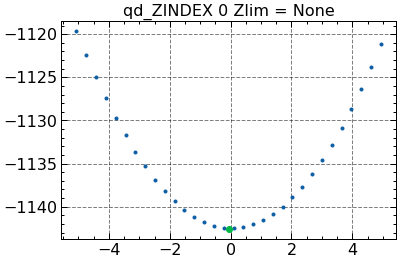

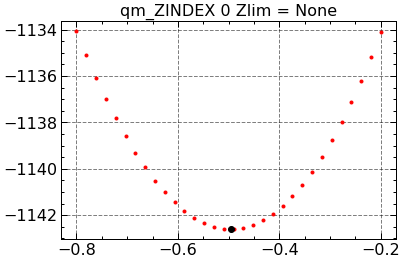

In [ ]:
#Zindex =0

folder_path=path_c1+'/ZINDEX_0'
C1_HD_REVB=pd.read_csv('/home/animesh.sah/Plots/C1_HD_REVB.csv',index_col=0)
pattern1 = os.path.join(folder_path, 'zlim_*revb=True_qd_v7.txt')
pattern2 = os.path.join(folder_path, 'zlim*_revb=True_v7.txt')
qd_search = glob.glob(pattern1)
qm_search = glob.glob(pattern2)
i=0
qd_search.sort()
qm_search.sort()

HD_C1_QD_errors=[]
HD_C1_QM_errors=[]
for file in qd_search:


    df = pd.read_csv(file,header=None,sep=' ')
    df=df.sort_values(0)
    match = re.search(r'zlim_([0-9]*\.?[0-9]+)_?revb=True_qd_v8', file)
    if match:
        zlim=float(match.group(1))
    else:
        zlim=None
    
    #one_sigma(np.array(df[0]),np.array(df[1]),C1_HD_REVB['qd'].iloc[i],C1_HD_REVB['MLE'].iloc[i],plot=True)

    i+=1
i=0
for file in qm_search:

    df = pd.read_csv(file,header=None,sep=' ')
    df=df.sort_values(0)
    df=df.drop_duplicates()
    match = re.search(r'zlim_([0-9]*\.?[0-9]+)_?revb=True_v8', file)
    if match:
        zlim=float(match.group(1))
    else:
        zlim=None
    plt.title('qm_ZINDEX 0 Zlim = '+str(zlim))

    #HD_C1_QM_errors.append(one_sigma(np.array(df[0]),np.array(df[1]),C1_HD_REVB['qm'].iloc[i],C1_HD_REVB['MLE'].iloc[i],plot=False))

    plt.plot(df[0],df[1],'r.')
    plt.plot(C1_HD_REVB['qm'].loc[2],C1_HD_REVB['MLE'].loc[2],'ko')
    plt.show()
    i+=1




In [19]:
#zindex=8
folder_path=path_c1+'/ZINDEX_8'
C1_CMB_REVB=pd.read_csv('/home/animesh.sah/Plots/C1_CMB_REVB.csv',index_col=0)
pattern1 = os.path.join(folder_path, 'zlim_*revb=True_qd.txt')
pattern2 = os.path.join(folder_path, 'zlim*_revb=True.txt')
qd_search = glob.glob(pattern1)
qm_search = glob.glob(pattern2)
i=0
qd_search.sort()
qm_search.sort()

CMB_C1_QM_errors=[]
CMB_C1_QD_errors=[]

for file in qd_search:


    df = pd.read_csv(file,header=None,sep=' ')
    df=df.sort_values(0)
    match = re.search(r'zlim_([0-9]*\.?[0-9]+)_?revb=True_qd', file)
    if match:
        zlim=float(match.group(1))
    else:
        zlim=None
    
    
    CMB_C1_QD_errors.append(one_sigma(np.array(df[0]),np.array(df[1]),np.array(df[0])[np.argmin(np.array(df[1]))],min(np.array(df[1])),plot=False))

    i+=1
i=0
for file in qm_search:

    df = pd.read_csv(file,header=None,sep=' ')
    df=df.sort_values(0)
    df=df.drop_duplicates()
    match = re.search(r'zlim_([0-9]*\.?[0-9]+)_?revb=True', file)
    if match:
        zlim=float(match.group(1))
    else:
        zlim=None

    CMB_C1_QM_errors.append(one_sigma(np.array(df[0]),np.array(df[1]),np.array(df[0])[np.argmin(np.array(df[1]))],min(np.array(df[1])),plot=False))


    i+=1


C1_CMB_REVB['QM_errors']=CMB_C1_QM_errors
C1_CMB_REVB['QD_errors']=CMB_C1_QD_errors
#C1_CMB_REVB.to_csv('/home/animesh.sah/Plots/C1_CMB_REVB_errors.csv')


In [4]:
#Zindex =0

folder_path=path_c1+'/ZINDEX_0'
C1_HD_REVB=pd.read_csv('/home/animesh.sah/Plots/C1_HD_REVB.csv',index_col=0)
pattern1 = os.path.join(folder_path, 'zlim_*revb=True_qd_v2.txt')
pattern2 = os.path.join(folder_path, 'zlim*_revb=True_v2.txt')
qd_search = glob.glob(pattern1)
qm_search = glob.glob(pattern2)
i=2
qd_search.sort()
qm_search.sort()


for file in qd_search:


    df = pd.read_csv(file,header=None,sep=' ')
    df=df.sort_values(0)
    match = re.search(r'zlim_([0-9]*\.?[0-9]+)_?revb=True_qd', file)
    if match:
        zlim=float(match.group(1))
    else:
        zlim=None
    
    plt.title('qd_ZINDEX 0 Zlim = '+str(zlim))
    #one_sigma(np.array(df[0]),np.array(df[1]),C1_HD_REVB['qd'].loc[i],C1_HD_REVB['MLE'].loc[i],plot=True)
    
    plt.plot(df[0],df[1],'.')
    plt.plot(C1_HD_REVB['qd'].loc[i],C1_HD_REVB['MLE'].loc[i],'o')
    plt.show()
    i+=1
i=2



#Zindex =0


pattern1 = os.path.join(folder_path, 'zlim_*revb=True_qd.txt')
pattern2 = os.path.join(folder_path, 'zlim*_revb=True.txt')
qd_search = glob.glob(pattern1)
qm_search = glob.glob(pattern2)
i=2
qd_search.sort()
qm_search.sort()


for file in qd_search:


    df = pd.read_csv(file,header=None,sep=' ')
    df=df.sort_values(0)
    match = re.search(r'zlim_([0-9]*\.?[0-9]+)_?revb=True_qd', file)
    if match:
        zlim=float(match.group(1))
    else:
        zlim=None
    if zlim==0.03486:
    
        plt.title('qd_ZINDEX 0 Zlim = '+str(zlim))
        #one_sigma(np.array(df[0]),np.array(df[1]),C1_HD_REVB['qd'].loc[i],C1_HD_REVB['MLE'].loc[i],plot=True)
        
        plt.plot(df[0],df[1],'.')
        plt.plot(C1_HD_REVB['qd'].loc[i],C1_HD_REVB['MLE'].loc[i],'o')
        plt.show()
        i+=1
i=0


   
   

NameError: name 'path_c1' is not defined

In [ ]:
#zindex=9

LG_C1_QM_errors=[]
LG_C1_QD_errors=[]
folder_path=path_c1+'/ZINDEX_9'
C1_LG_REVB=pd.read_csv('/home/animesh.sah/Plots/C1_LG_REVB.csv',index_col=0)
pattern1 = os.path.join(folder_path, 'zlim_*revb=True_qd.txt')
pattern2 = os.path.join(folder_path, 'zlim*_revb=True.txt')
qd_search = glob.glob(pattern1)
qm_search = glob.glob(pattern2)
i=0
qd_search.sort()
qm_search.sort()


for file in qd_search:


    df = pd.read_csv(file,header=None,sep=' ')
    df=df.sort_values(0)
    match = re.search(r'zlim_([0-9]*\.?[0-9]+)_?revb=True_qd', file)
    if match:
        zlim=float(match.group(1))
    else:
        zlim=None
    
    LG_C1_QD_errors.append(one_sigma(np.array(df[0]),np.array(df[1]),C1_LG_REVB['qd'].iloc[i],C1_LG_REVB['MLE'].iloc[i],plot=False))
    
    i+=1
i=0
for file in qm_search:

    df = pd.read_csv(file,header=None,sep=' ')
    df=df.sort_values(0)
    df=df.drop_duplicates()
    match = re.search(r'zlim_([0-9]*\.?[0-9]+)_?revb=True', file)
    if match:
        zlim=float(match.group(1))
    else:
        zlim=None
    

    LG_C1_QM_errors.append(one_sigma(np.array(df[0]),np.array(df[1]),C1_LG_REVB['qm'].iloc[i],C1_LG_REVB['MLE'].iloc[i],plot=False)
)

    i+=1

C1_LG_REVB['QD_errors']=LG_C1_QD_errors
C1_LG_REVB['QM_errors']=LG_C1_QM_errors
#C1_LG_REVB.to_csv('/home/animesh.sah/Plots/C1_LG_REVB_errors.csv')



# C2

In [12]:
path_c2='/home/animesh.sah/LANE/C2/Outputs'
folder_path1=path_c2+'/ZINDEX_0'
folder_path = '/home/animesh.sah/LANE/C2/Outputs/ZINDEX_0'

C2_HD_REVB=pd.read_csv('/home/animesh.sah/Plots/HD_REVB_TRUE_C2.csv',index_col=0)
pattern1 = os.path.join(folder_path, 'zlim_*_revb=True_qd_v0.txt')

pattern1 = os.path.join(folder_path, 'zlim_*_revb=True_qd_v0.txt')

pattern2 = os.path.join(folder_path, 'zlim*_revb=True.txt')
qd_search = glob.glob(pattern1)
qm_search = glob.glob(pattern2)
i=0
qd_search.sort()
qm_search.sort()
HD_C2_QD_errors=[]
HD_C2_QM_errors=[]

for file in qd_search:


    df = pd.read_csv(file,header=None,sep=' ')
    df=df.sort_values(0)
    df=df.drop_duplicates()

    match = re.search(r'zlim_([0-9]*\.?[0-9]+)_?revb=True_qd_v0', file)
    if match:
        zlim=float(match.group(1))
    else:
        zlim=None
    
    if zlim == 0.01613 or zlim== 0.02873:   #wierd for these two z hence used a Univariate Spline

        smoothing_factor = 0.01
        spline=UnivariateSpline(np.array(df[0]),np.array(df[1]-C2_HD_REVB['MLE'].iloc[i]-1),s=smoothing_factor)
        roots=spline.roots()
        roots=list(roots)
       
        HD_C2_QD_errors.append(roots)

    else:
    
        HD_C2_QD_errors.append(one_sigma(np.array(df[0]),np.array(df[1]),C2_HD_REVB['qd'].iloc[i],C2_HD_REVB['MLE'].iloc[i],plot=False))
    i+=1

i=0
for file in qm_search:

    df = pd.read_csv(file,header=None,sep=' ')
    df=df.sort_values(0)
    df=df.drop_duplicates()
    match = re.search(r'zlim_([0-9]*\.?[0-9]+)_?revb=True', file)
    if match:
        zlim=float(match.group(1))
    else:
        zlim=None

    HD_C2_QM_errors.append(one_sigma(np.array(df[0]),np.array(df[1]),C2_HD_REVB['qm'].iloc[i],C2_HD_REVB['MLE'].iloc[i],plot=False))

    i+=1



C2_HD_REVB['QD_errors']=HD_C2_QD_errors
C2_HD_REVB['QM_errors']=HD_C2_QM_errors


C2_HD_REVB.to_csv('/home/animesh.sah/Plots/HD_REVB_TRUE_C2_errors.csv')


In [14]:
path_c2='/home/animesh.sah/LANE/C2/Outputs'
folder_path1=path_c2+'/ZINDEX_10'
folder_path = '/home/animesh.sah/LANE/C2/Outputs/ZINDEX_10'

C2_CMB_REVB=pd.read_csv('/home/animesh.sah/Plots/CMB_REVB_TRUE_C2.csv',index_col=0)
pattern1 = os.path.join(folder_path, 'zlim_*_revb=True_qd_v0.txt')

pattern1 = os.path.join(folder_path, 'zlim_*_revb=True_qd_v0.txt')

pattern2 = os.path.join(folder_path, 'zlim*_revb=True.txt')
qd_search = glob.glob(pattern1)
qm_search = glob.glob(pattern2)
i=0
qd_search.sort()
qm_search.sort()


CMB_C2_QM_errors=[]
CMB_C2_QD_errors=[]

for file in qd_search:


    df = pd.read_csv(file,header=None,sep=' ')
    df=df.sort_values(0)
    df=df.drop_duplicates()

    match = re.search(r'zlim_([0-9]*\.?[0-9]+)_?revb=True_qd_v0', file)
    if match:
        zlim=float(match.group(1))
    else:
        zlim=None
    
    
    if zlim== 0.02873:
    

        smoothing_factor = 0.01
        spline=UnivariateSpline(np.array(df[0]),np.array(df[1]-C2_CMB_REVB['MLE'].iloc[i]-1),s=smoothing_factor)
        roots=spline.roots()
        roots=list(roots)

        CMB_C2_QD_errors.append(roots)
    else:
        CMB_C2_QD_errors.append(one_sigma(np.array(df[0]),np.array(df[1]),C2_CMB_REVB['qd'].iloc[i],C2_CMB_REVB['MLE'].iloc[i],plot=False))
    i+=1

i=0
for file in qm_search:

    df = pd.read_csv(file,header=None,sep=' ')
    df=df.sort_values(0)
    df=df.drop_duplicates()
    match = re.search(r'zlim_([0-9]*\.?[0-9]+)_?revb=True', file)
    if match:
        zlim=float(match.group(1))
    else:
        zlim=None    
    CMB_C2_QM_errors.append(one_sigma(np.array(df[0]),np.array(df[1]),C2_CMB_REVB['qm'].iloc[i],C2_CMB_REVB['MLE'].iloc[i],plot=False))

    i+=1




#CMB_C2_QD_errors
import json
C2_CMB_REVB['QD_errors']=CMB_C2_QD_errors
C2_CMB_REVB['QM_errors']=CMB_C2_QM_errors

C2_CMB_REVB.to_csv('/home/animesh.sah/Plots/CMB_REVB_TRUE_C2_errors.csv')



In [15]:
path_c2='/home/animesh.sah/LANE/C2/Outputs'
folder_path1=path_c2+'/ZINDEX_11'
folder_path = '/home/animesh.sah/LANE/C2/Outputs/ZINDEX_11'

C2_LG_REVB=pd.read_csv('/home/animesh.sah/Plots/LG_REVB_TRUE_C2.csv',index_col=0)
pattern1 = os.path.join(folder_path, 'zlim_*_revb=True_qd_v0.txt')

pattern1 = os.path.join(folder_path, 'zlim_*_revb=True_qd_v0.txt')

pattern2 = os.path.join(folder_path, 'zlim*_revb=True.txt')
qd_search = glob.glob(pattern1)
qm_search = glob.glob(pattern2)
i=0
qd_search.sort()
qm_search.sort()


LG_C2_QM_errors=[]
LG_C2_QD_errors=[]
for file in qd_search:


    df = pd.read_csv(file,header=None,sep=' ')
    df=df.sort_values(0)
    df=df.drop_duplicates()

    match = re.search(r'zlim_([0-9]*\.?[0-9]+)_?revb=True_qd_v0', file)
    if match:
        zlim=float(match.group(1))
    else:
        zlim=None
    
    #plt.title('qd_ZINDEX 11 Zlim = '+str(zlim))
    df = df[abs(df[1] - C2_LG_REVB['MLE'].iloc[i]) < 20]
    
    if zlim ==  0.01826 or zlim== 0.02873:
    

        smoothing_factor = 0.01
        spline=UnivariateSpline(np.array(df[0]),np.array(df[1]-C2_LG_REVB['MLE'].iloc[i]-1),s=smoothing_factor)
        roots=spline.roots()
        roots=list(roots)
        roots_fin=[C2_LG_REVB['qd'].iloc[i]-roots[0],roots[1]-C2_LG_REVB['qd'].iloc[i]]
        LG_C2_QD_errors.append(roots_fin)
    else:   
        LG_C2_QD_errors.append(one_sigma(np.array(df[0]),np.array(df[1]),C2_LG_REVB['qd'].iloc[i],C2_LG_REVB['MLE'].iloc[i],plot=False))
    i+=1
i=0

for file in qm_search:

    df = pd.read_csv(file,header=None,sep=' ')
    df=df.sort_values(0)
    df=df.drop_duplicates()
    match = re.search(r'zlim_([0-9]*\.?[0-9]+)_?revb=True', file)
    if match:
        zlim=float(match.group(1))
    else:
        zlim=None    
    LG_C2_QM_errors.append(one_sigma(np.array(df[0]),np.array(df[1]),C2_LG_REVB['qm'].iloc[i],C2_LG_REVB['MLE'].iloc[i],plot=False))
    i+=1


C2_LG_REVB['QD_errors']=LG_C2_QD_errors
C2_LG_REVB['QM_errors']=LG_C2_QM_errors

C2_LG_REVB.to_csv('/home/animesh.sah/Plots/LG_REVB_TRUE_C2_errors.csv')



